In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.dates as mdates
sns.set(context='talk', style='whitegrid')

In [ ]:
df = pd.read_csv('../data/processed/data_cleaned.csv')
df.head()

,date,VIG,CPI,UNEMP,SPREAD
0,2007-01-01,54.29500,202.416,4.6,-0.12
1,2007-02-01,55.10000,203.499,4.5,-0.13
2,2007-03-01,53.49500,205.352,4.4,-0.01
3,2007-04-01,55.25925,206.686,4.5,0.02
4,2007-05-01,56.77005,207.949,4.4,-0.02


In [ ]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    223 non-null    object 
 1   VIG     223 non-null    float64
 2   CPI     223 non-null    float64
 3   UNEMP   223 non-null    float64
 4   SPREAD  223 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.8+ KB


(None,
 date      0
 VIG       0
 CPI       0
 UNEMP     0
 SPREAD    0
 dtype: int64)

In [ ]:
desc = df[['CPI', 'VIG', 'UNEMP', 'SPREAD']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
CPI,223.0,249.483395,32.506153,202.416,226.097,239.261,260.431,323.048,0.819453,-0.399052
VIG,223.0,97.807522,46.840441,33.820,56.360,81.580,138.140,206.560,0.668406,-0.755255
UNEMP,223.0,5.870404,2.214311,3.400,4.050,5.000,7.650,14.800,0.958060,0.321907
SPREAD,223.0,1.063722,0.965633,-0.930,0.250,1.060,1.765,2.830,0.017548,-0.960421


Text(0.5, 1.0, 'Spread Distribution')

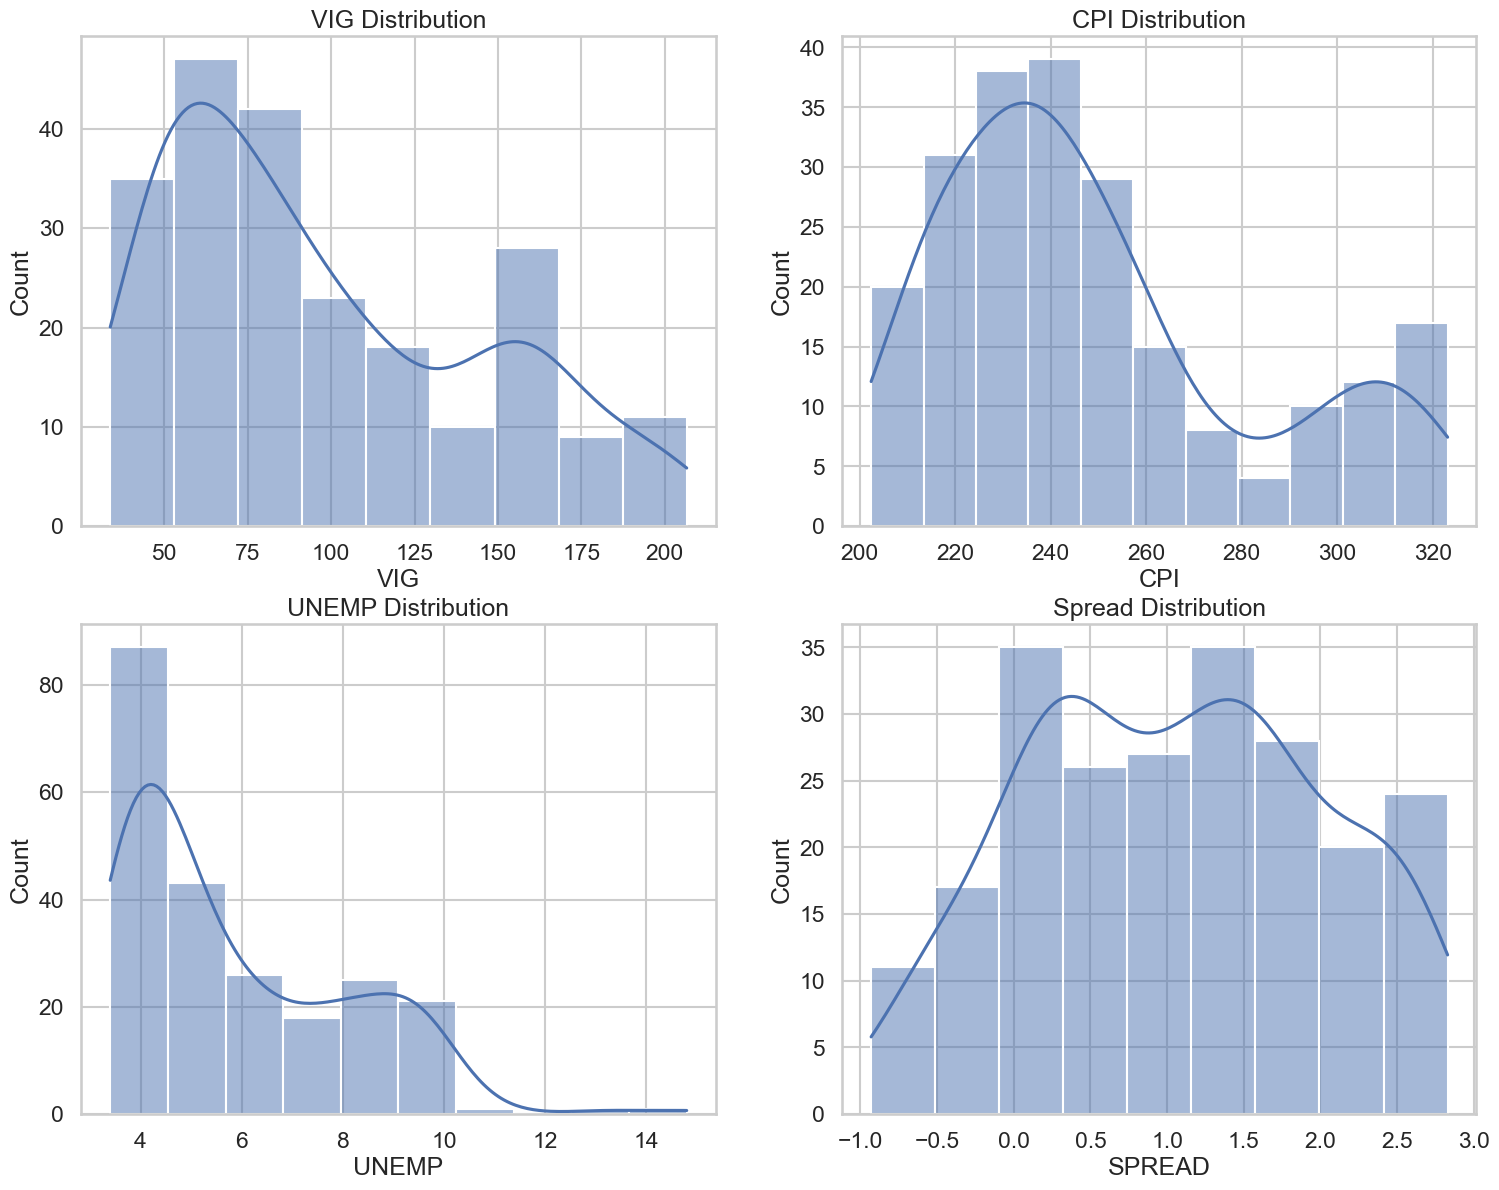

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.histplot(df['VIG'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('VIG Distribution')

sns.histplot(x=df['CPI'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('CPI Distribution')

sns.histplot(x=df['UNEMP'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('UNEMP Distribution')

sns.histplot(x=df['SPREAD'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Spread Distribution')

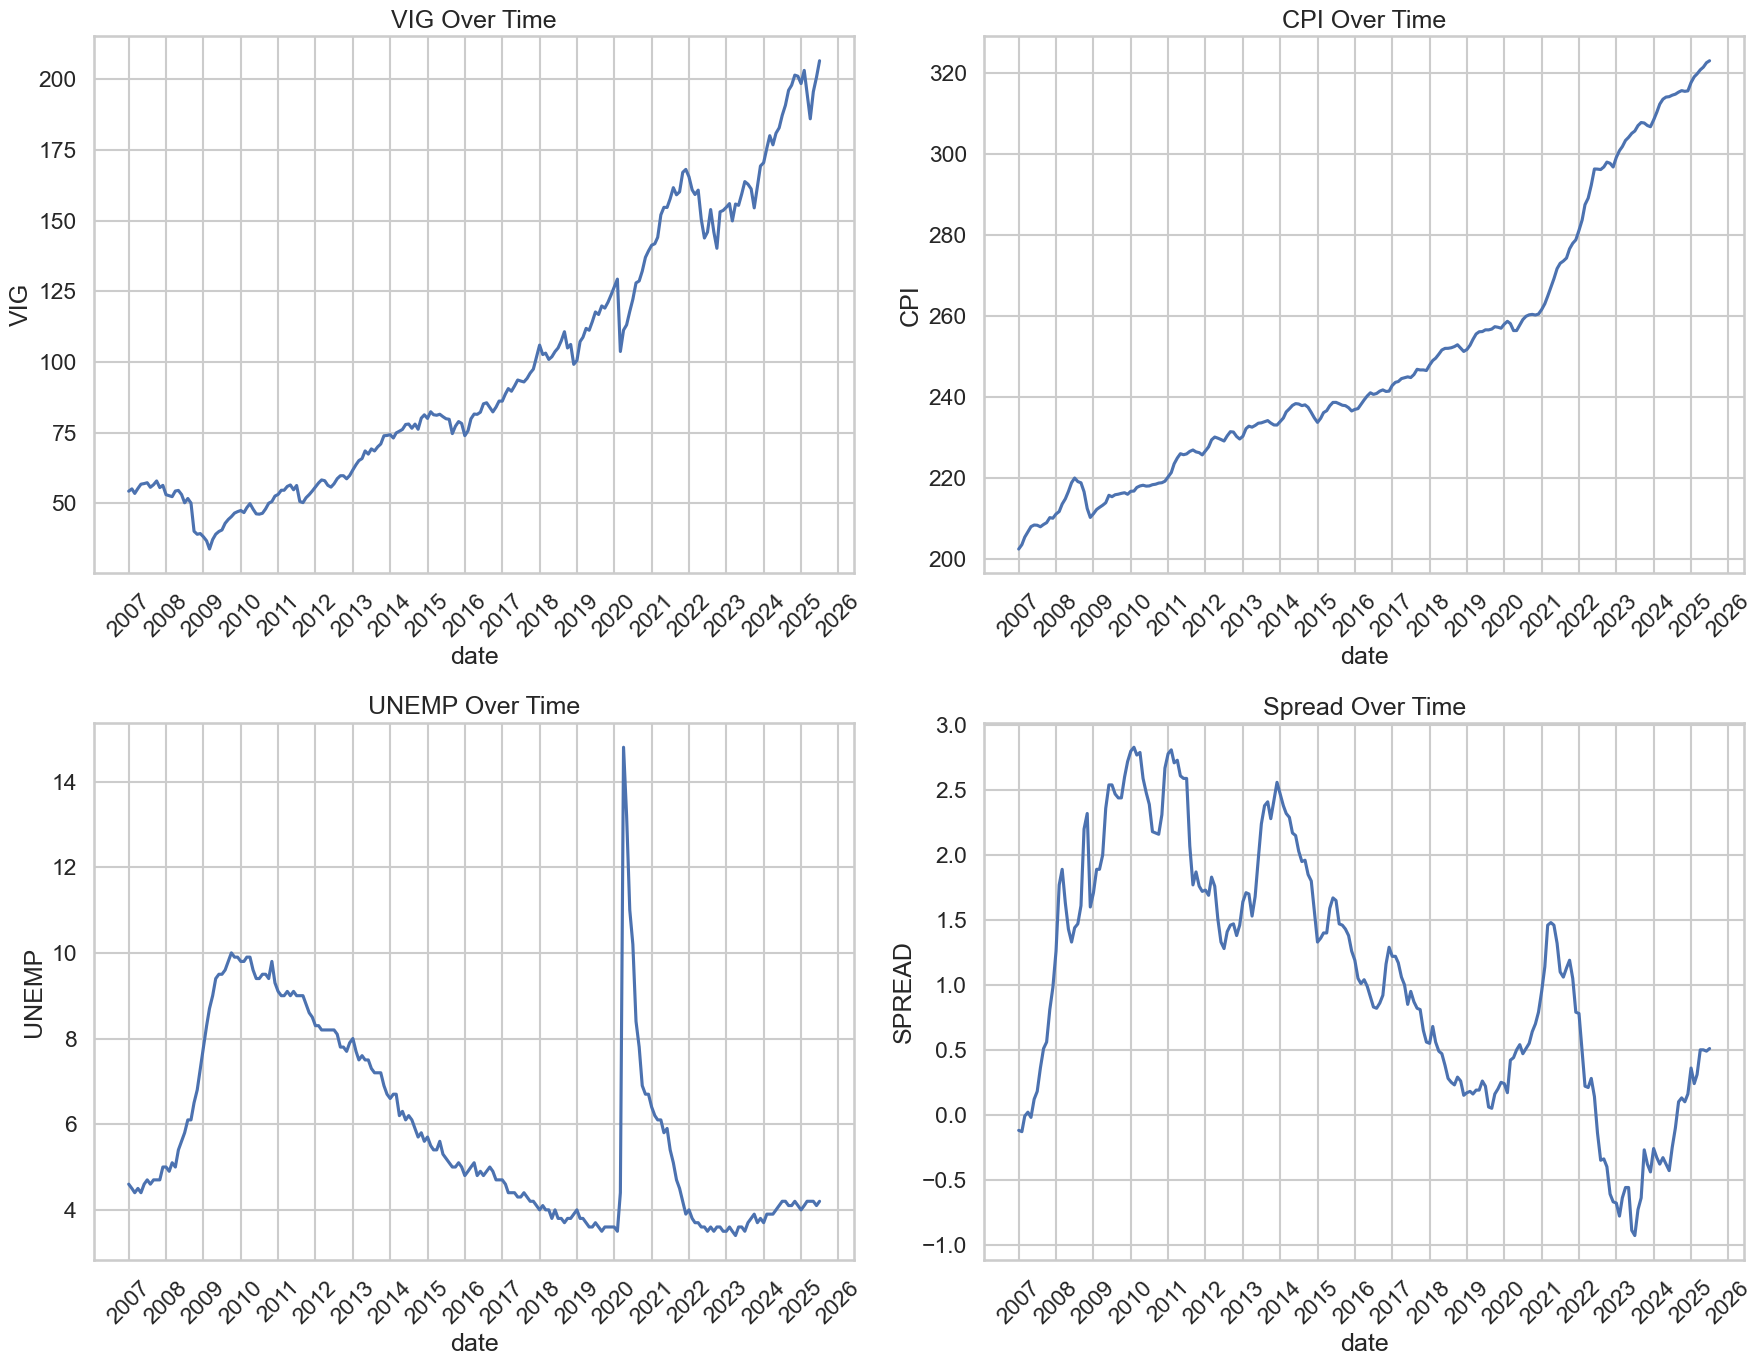

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
df['date'] = pd.to_datetime(df['date'])

# VIG
sns.lineplot(x=df['date'], y=df['VIG'], ax=axes[0, 0])
axes[0, 0].set_title('VIG Over Time')

# CPI
sns.lineplot(x=df['date'], y=df['CPI'], ax=axes[0, 1])
axes[0, 1].set_title('CPI Over Time')

# UNEMP
sns.lineplot(x=df['date'], y=df['UNEMP'], ax=axes[1, 0])
axes[1, 0].set_title('UNEMP Over Time')

# Spread
sns.lineplot(x=df['date'], y=df['SPREAD'], ax=axes[1, 1])
axes[1, 1].set_title('Spread Over Time')

# Format x-axis ticks: show one label per year
for ax in axes.flat:
    ax.xaxis.set_major_locator(mdates.YearLocator(base=1))   # every year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


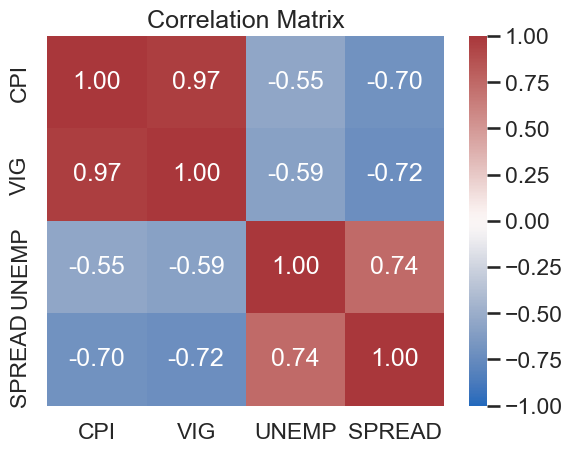

,CPI,VIG,UNEMP,SPREAD
CPI,1.000000,0.968539,-0.547357,-0.700500
VIG,0.968539,1.000000,-0.587903,-0.719097
UNEMP,-0.547357,-0.587903,1.000000,0.737280
SPREAD,-0.700500,-0.719097,0.737280,1.000000


In [ ]:
corr = df[['CPI', 'VIG', 'UNEMP', 'SPREAD']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr